In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pickle

In [2]:
df = pd.read_csv('weekly_prices_2.csv')

In [3]:
df.head(10)

,week_of,dollars_per_gallon
0,2020-11-23,2.194
1,2020-11-16,2.202
2,2020-11-09,2.188
3,2020-11-02,2.204
4,2020-10-26,2.234
5,2020-10-19,NaN
6,2020-10-12,2.257
7,2020-10-05,2.262
8,2020-09-28,2.259
9,2020-09-21,2.259


In [4]:
df = df.dropna()

In [5]:
df['dollars_per_gallon'].isnull().any()

False

In [6]:
df['week_of'] = pd.to_datetime(df['week_of'])

In [7]:
df['day'] = df['week_of'].dt.day
df['month'] = df['week_of'].dt.month
df['year'] = df['week_of'].dt.year

In [8]:
df.head(10)

,week_of,dollars_per_gallon,day,month,year
0,2020-11-23,2.194,23,11,2020
1,2020-11-16,2.202,16,11,2020
2,2020-11-09,2.188,9,11,2020
3,2020-11-02,2.204,2,11,2020
4,2020-10-26,2.234,26,10,2020
6,2020-10-12,2.257,12,10,2020
7,2020-10-05,2.262,5,10,2020
8,2020-09-28,2.259,28,9,2020
9,2020-09-21,2.259,21,9,2020
10,2020-09-14,2.274,14,9,2020


In [9]:
df.dtypes

week_of               datetime64[ns]
dollars_per_gallon           float64
day                            int64
month                          int64
year                           int64
dtype: object

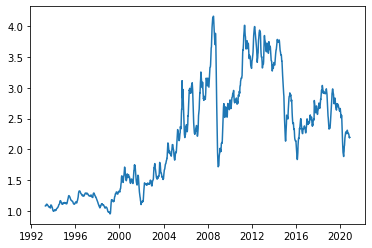

In [10]:
plt.plot(df['week_of'], df['dollars_per_gallon']);

In [11]:
df = df.drop(columns='week_of')

In [12]:
df.head(10)

,dollars_per_gallon,day,month,year
0,2.194,23,11,2020
1,2.202,16,11,2020
2,2.188,9,11,2020
3,2.204,2,11,2020
4,2.234,26,10,2020
6,2.257,12,10,2020
7,2.262,5,10,2020
8,2.259,28,9,2020
9,2.259,21,9,2020
10,2.274,14,9,2020


In [13]:
X = df[['month', 'day', 'year']]
y = df['dollars_per_gallon']

In [14]:
X.shape

(1305, 3)

In [15]:
y.shape

(1305,)

In [16]:
# Basic Linear Regression Model

model = LinearRegression()

In [17]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Predicting on user inputs of month and year they want to take their trip

day = 24
month = 8
year = 2022
X_test = [[month, day, year]]
y_pred = model.predict(X_test)

print(f'Predicted price for gas on {month}-{day}-{year} ${y_pred[0]:,.0f}')

Predicted price for gas on 8-24-2022 $4


In [22]:
# Dump the trained linear regression model with Pickle

pickle_filename = 'gas_model.pkl'
pickled_model = open(pickle_filename, 'wb') # Open the file to save as pkl file
pickle.dump(model, pickled_model)
pickled_model.close() # Close the pickle instances

# Loading the saved model
model_pkl = open(pickle_filename, 'rb')
gas_linear_model = pickle.load(model_pkl)
print('Loaded model :: ', gas_linear_model)

Loaded model ::  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [24]:
gas_linear_model.predict([[2, 14, 2022]]) # testing model

array([3.45541266])